# Pendulo Simple (Lagrangiano)

In [1]:
%reset -f

import numpy as np
import sympy as smp

from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

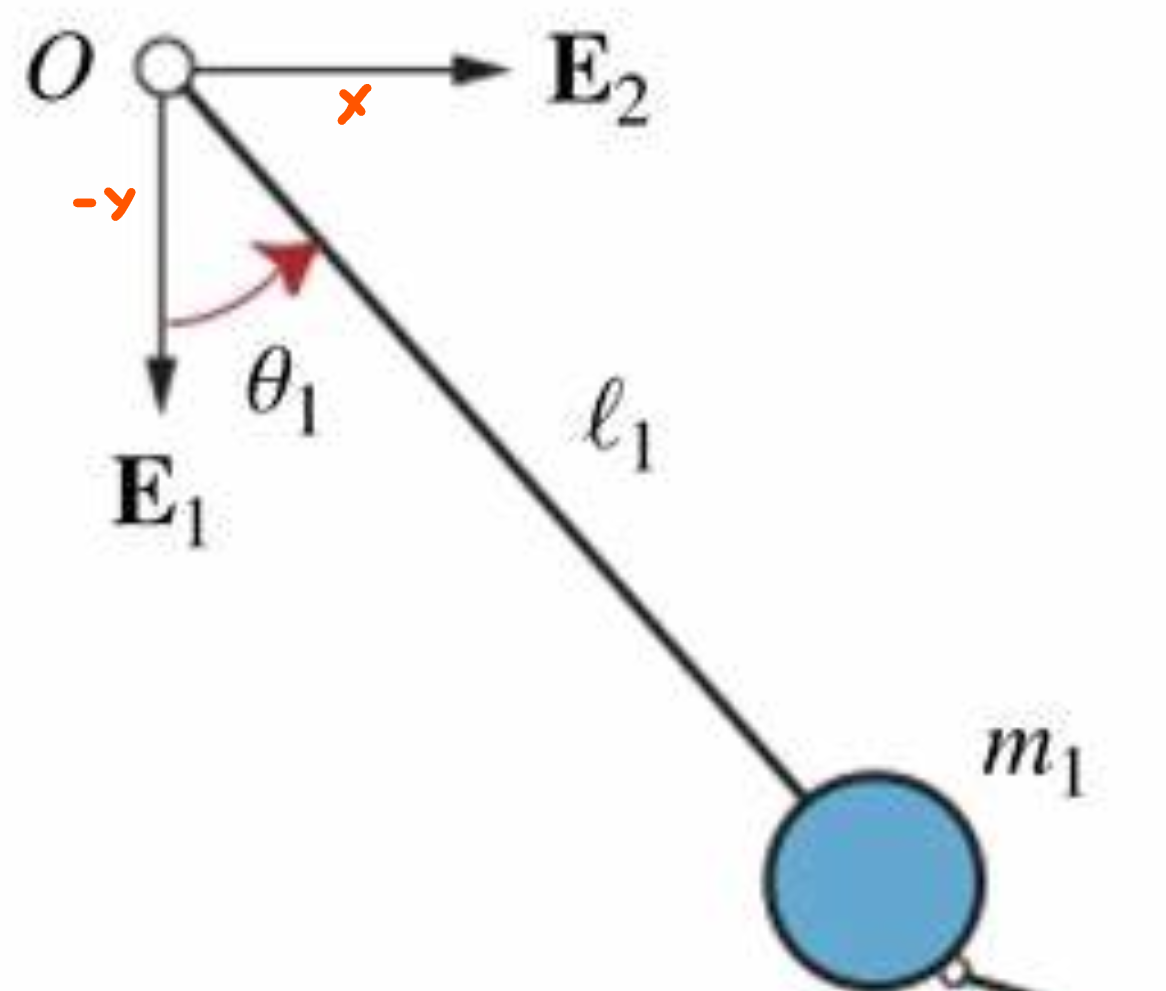

Define los simbolos apropiados en sympy

In [2]:
t, g = smp.symbols('t g', positive=True)
m, L = smp.symbols('m L', positive=True)

Definimos a $\theta$ y a sus dos primeras derivadas temporales

In [3]:
theta = smp.symbols(r'\theta', cls=smp.Function)(t)
d1_theta = smp.diff(theta, t)
d2_theta = smp.diff(d1_theta, t)

Parametrizamos el movimiento de la masa: <br> <br>

En **x**: $$x = L\sin(\theta(t))$$ <br> <br>

En **y**: $$y = -L\cos(\theta(t))$$

In [4]:
x = L * smp.sin(theta)
y = -L * smp.cos(theta)

vx = smp.diff(x, t)
vy = smp.diff(y, t)

v_squared = (vx**2 + vy**2).simplify(force=True)

Transformamos las funciones simbólicas de velocidad y posición a funciones numéricas

In [5]:
x_f = smp.lambdify((L, theta), x, modules='numpy')
y_f = smp.lambdify((L, theta), y, modules='numpy')

vx_f = smp.lambdify((L, theta, d1_theta), vx, modules='numpy')
vy_f = smp.lambdify((L, theta, d1_theta), vy, modules='numpy')

Definimos la energía cinética y potencial. <br>
Se construye la función Lagrangiana: $L = T - U$

In [6]:
T = smp.Rational(1, 2) * m * v_squared
U = m*g*y
Lag = T - U

In [7]:
Lag

L**2*m*Derivative(\theta(t), t)**2/2 + L*g*m*cos(\theta(t))

Se obtienen las ecuaciones de movimiento:  <br> <br>

$$\dot{p}_{q} - \nabla_{q}L = 0$$ <br> <br>

donde:  <br> <br>

$$p_{q} = \nabla_{\dot{q}}L$$

In [12]:
Lag

L**2*m*Derivative(\theta(t), t)**2/2 + L*g*m*cos(\theta(t))

In [9]:
gen_p = smp.diff(Lag, d1_theta)
gen_f = smp.diff(Lag, theta)
eq = smp.diff(gen_p, t) - gen_f

In [10]:
eq

L**2*m*Derivative(\theta(t), (t, 2)) + L*g*m*sin(\theta(t))

Se despeja de la ecuación de moviemiento $\ddot{\theta}$

In [11]:
d2_theta_explicit = smp.solve(eq, d2_theta)[0]
d2_theta_explicit

-g*sin(\theta(t))/L

Para resolver numericamente la ecuación de segundo orden se tiene que transformar en un sistema de ecuaciones de primer orden, para eso realizamos la siguiente sustitución <br>
<ul>
  <li>$\dot{\theta} = z$</li>
  <li>$\dot{z} = \ddot{\theta} = ...$</li>
</ul> 
y este sistema lo transformamos en funciones númericas

In [12]:
dtheta_dt_f = smp.lambdify(d1_theta, d1_theta, modules='numpy')
dz_dt_f = smp.lambdify((t, g, L, theta), d2_theta_explicit, modules='numpy')

Se define un vector $\vec{S} = (\theta, z)$ y una función que toma $\vec{S}$ y $t$, y devuelve $\dot{S}$ para poder resolver el sistema de ecuaciones

In [13]:
def dSdt(t, S, g, L):
    theta, z = S
    return [
        dtheta_dt_f(z),
        dz_dt_f(t, g, L, theta)
    ]

Definimos un arreglo de puntos en el tiempo en el cual queremos obtener la solución

In [14]:
t0 = 0
tf = 40
t_size = 4001
t = np.linspace(t0, tf, t_size)

Se definen algunas constantes (aceleración de la gravedad y masa) que se guardan en la lista args y se definen las condiciones iniciales $\theta_{0}$ y $\dot{\theta}_{0}$ y  que se guardan en la lista S0

In [15]:
g = 9.81
m = 2
L = 3
args = [g, L]

In [16]:
theta0 = np.pi/2
d1_theta0 = 0
S0 = [theta0, d1_theta0]

Se utiliza la función solve_ivp para resolver la ecuación diferencial

In [17]:
sol = solve_ivp(dSdt, t_span=(t0, tf), y0=S0, method='DOP853', t_eval=t, args=args)

Guardamos la solución y se grafica

In [18]:
theta_sol = sol.y[0]
d1_theta_sol = sol.y[1]

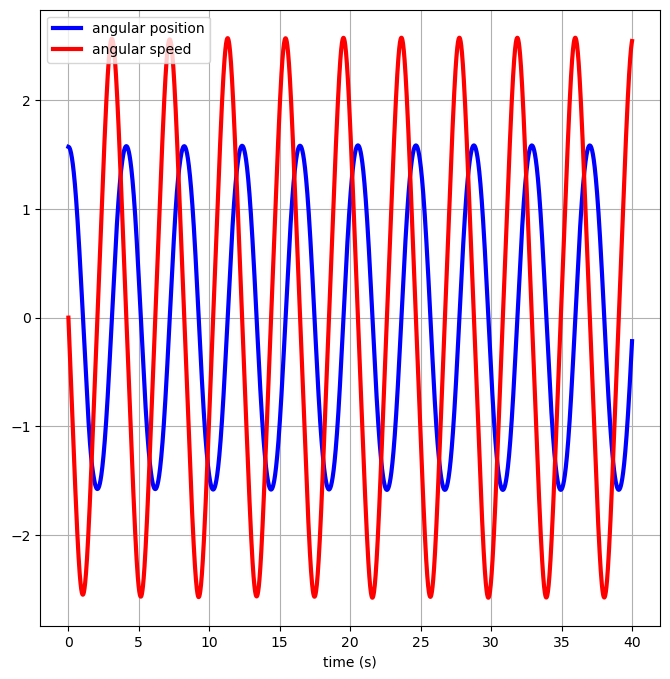

In [19]:
plt.figure(figsize=(8, 8))

plt.plot(t, theta_sol, lw=3, c='blue', label='angular position')
plt.plot(t, d1_theta_sol, lw=3, c='red', label='angular speed')

plt.xlabel('time (s)')
plt.legend()
plt.grid()
plt.show()

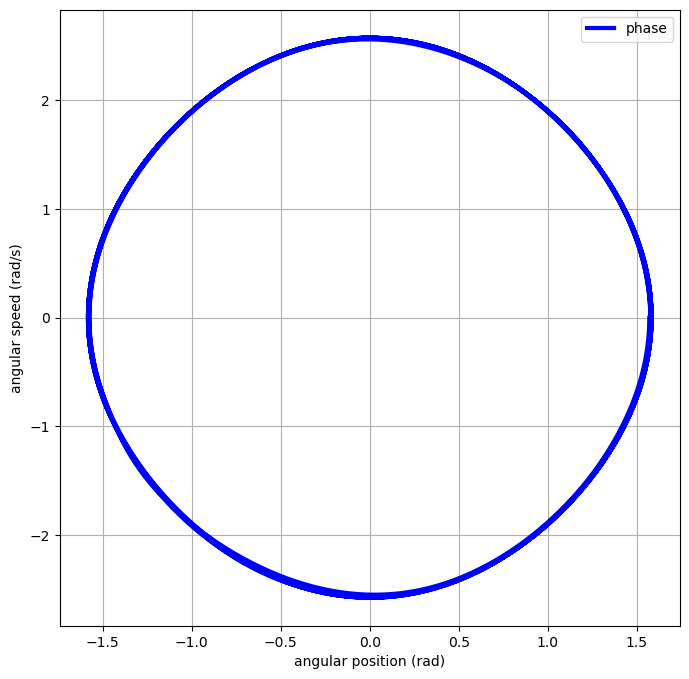

In [20]:
plt.figure(figsize=(8, 8))

plt.plot(theta_sol, d1_theta_sol, lw=3, c='blue', label='phase')

plt.ylabel('angular speed (rad/s)')
plt.xlabel('angular position (rad)')
plt.legend()
plt.grid()
plt.show()

Creamos funciones donde ingresamos las funciones númericas de posición y velocidad anteriormente transformadas

In [21]:
def eval_positions(L, theta):
    return [
        x_f(L, theta),
        y_f(L, theta)
    ]

def eval_velocities(L, theta, d1_theta):
    return [
        vx_f(L, theta, d1_theta),
        vy_f(L, theta, d1_theta)
    ]

Calculamos las posiciones y velocidades en $x$ e $y$

In [22]:
x, y = eval_positions(L, theta_sol)
vx, vy = eval_velocities(L, theta_sol, d1_theta_sol)

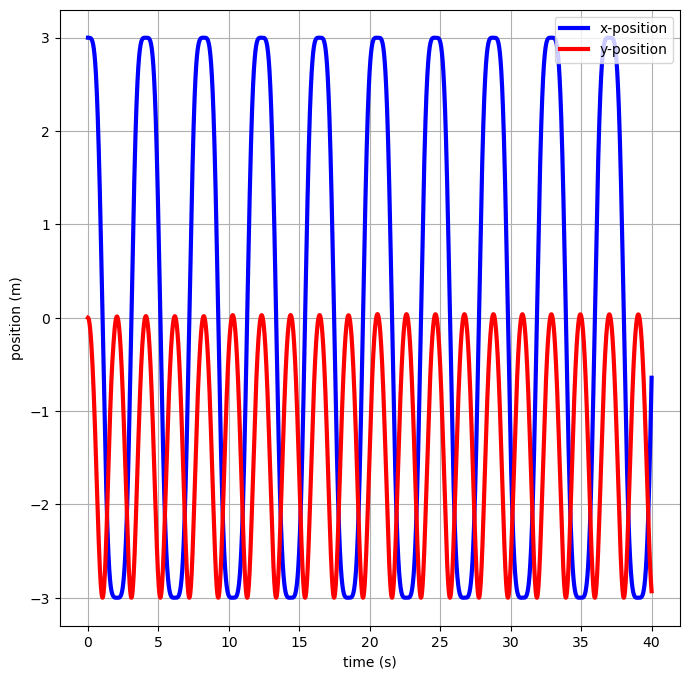

In [23]:
plt.figure(figsize=(8, 8))

plt.plot(t, x, lw=3, c='blue', label='x-position')
plt.plot(t, y, lw=3, c='red', label='y-position')

plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend()
plt.grid()
plt.show()

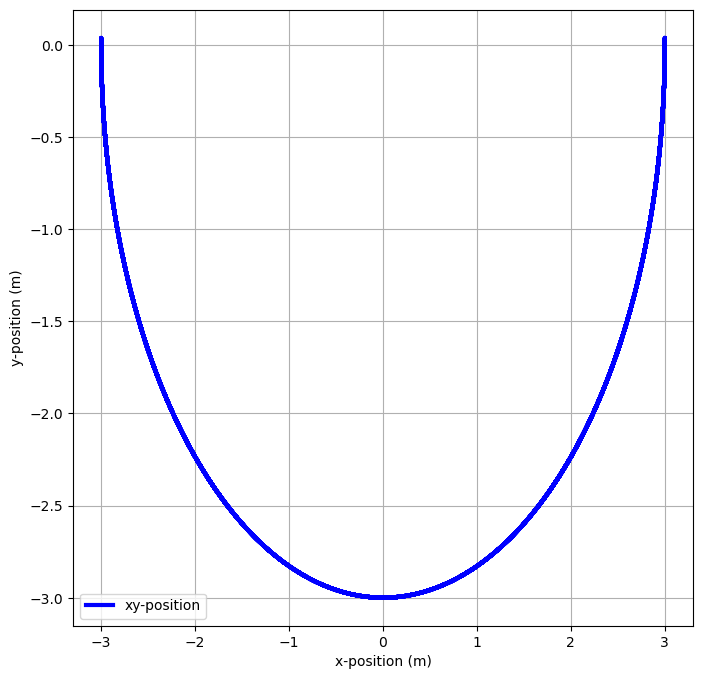

In [24]:
plt.figure(figsize=(8, 8))

plt.plot(x, y, lw=3, c='blue', label='xy-position')

plt.xlabel('x-position (m)')
plt.ylabel('y-position (m)')
plt.legend()
plt.grid()
plt.show()

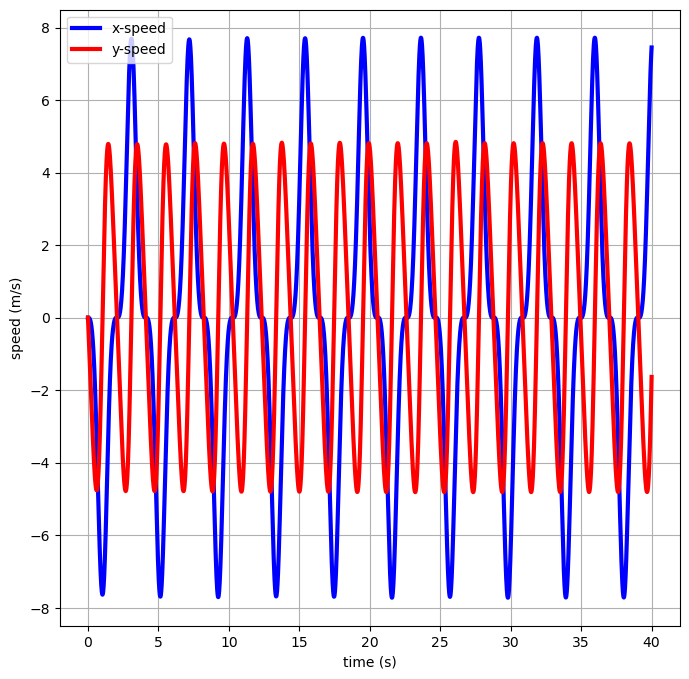

In [25]:
plt.figure(figsize=(8, 8))

plt.plot(t, vx, lw=3, c='blue', label='x-speed')
plt.plot(t, vy, lw=3, c='red', label='y-speed')

plt.xlabel('time (s)')
plt.ylabel('speed (m/s)')
plt.legend()
plt.grid()
plt.show()

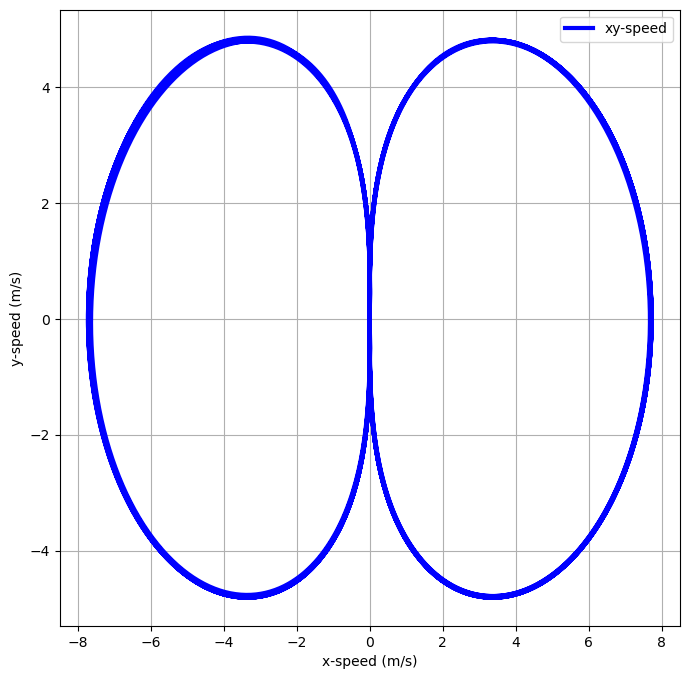

In [26]:
plt.figure(figsize=(8, 8))

plt.plot(vx, vy, lw=3, c='blue', label='xy-speed')

plt.xlabel('x-speed (m/s)')
plt.ylabel('y-speed (m/s)')
plt.legend()
plt.grid()
plt.show()

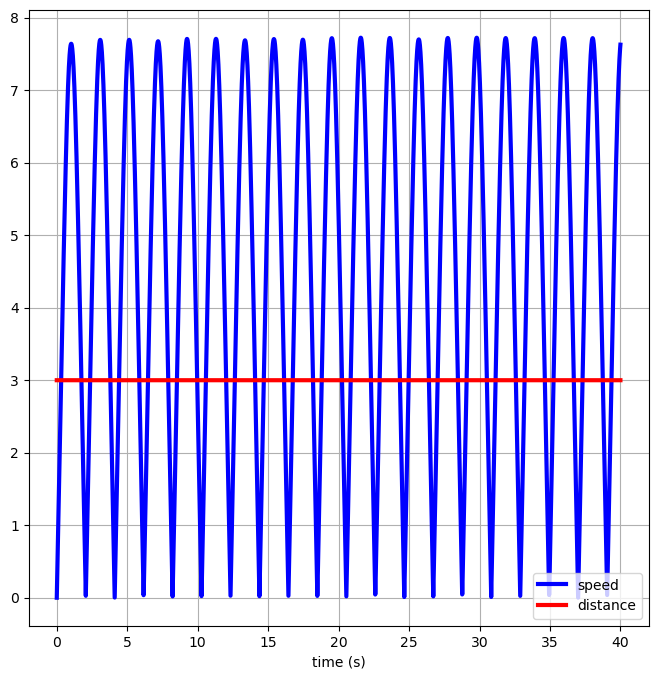

In [27]:
plt.figure(figsize=(8, 8))

plt.plot(t, np.sqrt(vx**2 + vy**2), lw=3, c='blue', label='speed')
plt.plot(t, np.sqrt(x**2 + y**2), lw=3, c='red', label='distance')

plt.xlabel('time (s)')
plt.legend()
plt.grid()
plt.show()

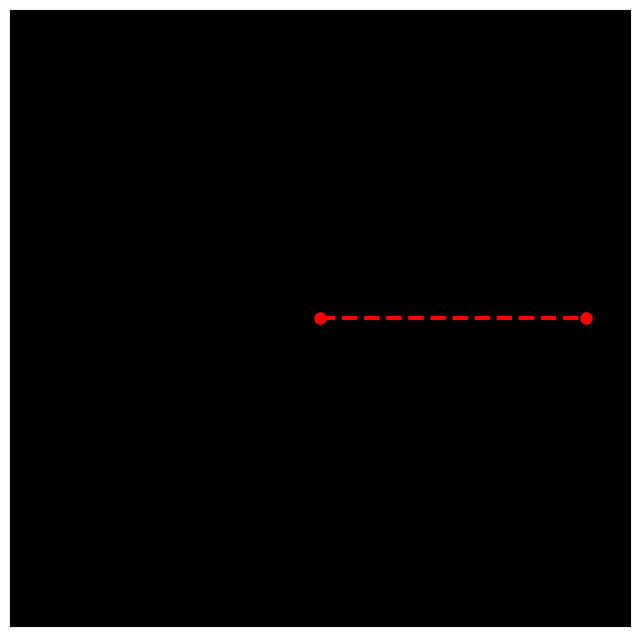

In [28]:
fps = len(t[t<1])
frames = t_size - 1
interval = (tf/frames)*1000

def animate(i):
    ln1.set_data([0, x[i]], [0, y[i]])

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)

ax.set_xlim(-L-0.5, L+0.5)
ax.set_ylim(-L-0.5, L+0.5)

ani = animation.FuncAnimation(fig, animate, frames=frames, interval=interval)
ani.save('Animations/simple_pendulum.mp4', writer='ffmpeg', fps=fps)